In [1]:
!which python3

/opt/miniconda3/envs/dsi-env/bin/python3


# Exploratory Task

## Load Data

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from utils import load_voter_data_txt, clean_voter_data, plot_voter_data

In [3]:
voter_data_path = "./data/ncvoter_Statewide.txt"    # statewide
# voter_data_path = "./data/ncvoter53.txt"    # lee county

#voter_data = load_voter_data_txt(voter_data_path, delimiter='\t', encoding='ISO-8859-1')
voter_data = pd.read_pickle("./data/voter_data.pkl")
print(voter_data.shape)
voter_data.head()

(8781283, 67)


,county_id,county_desc,voter_reg_num,ncid,last_name,first_name,middle_name,name_suffix_lbl,status_cd,voter_status_desc,...,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,vtd_abbrv,vtd_desc
0,1,ALAMANCE,9005990,AA56273,AABEL,RUTH,EVELYN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ALAMANCE,9178574,AA201627,AARDEN,JONI,AUTUMN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALAMANCE,9205561,AA216996,AARMSTRONG,TIMOTHY,DUANE,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,PROSECUTORIAL DISTRICT 17,103,103
3,1,ALAMANCE,9048723,AA98377,AARON,CHRISTINA,CASTAGNA,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,03S,03S
4,1,ALAMANCE,9019674,AA69747,AARON,CLAUDIA,HAYDEN,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,124,124


In [5]:
print(voter_data.columns)
voter_data.groupby('county_desc').size().reset_index(name='count')

Index(['county_id', 'county_desc', 'voter_reg_num', 'ncid', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'status_cd',
       'voter_status_desc', 'reason_cd', 'voter_status_reason_desc',
       'res_street_address', 'res_city_desc', 'state_cd', 'zip_code',
       'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4', 'mail_city',
       'mail_state', 'mail_zipcode', 'full_phone_number', 'confidential_ind',
       'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code',
       'birth_year', 'age_at_year_end', 'birth_state', 'drivers_lic',
       'precinct_abbrv', 'precinct_desc', 'municipality_abbrv',
       'municipality_desc', 'ward_abbrv', 'ward_desc', 'cong_dist_abbrv',
       'super_court_abbrv', 'judic_dist_abbrv', 'nc_senate_abbrv',
       'nc_house_abbrv', 'county_commiss_abbrv', 'county_commiss_desc',
       'township_abbrv', 'township_desc', 'school_dist_abbrv',
       'school_dist_desc', 'fire_dist_abbrv', 'fire_dist_desc',
       'water_di

,county_desc,count
0,ALAMANCE,134050
1,ALEXANDER,29309
2,ALLEGHANY,9380
3,ANSON,18366
4,ASHE,23329
...,...,...
95,WAYNE,88101
96,WILKES,51057
97,WILSON,62553
98,YADKIN,28626


In [6]:
voter_data['voter_status_desc'].unique()

array(['REMOVED', 'ACTIVE', 'INACTIVE', 'DENIED', 'TEMPORARY'],
      dtype=object)

## Data Preprocessing

In [7]:
# Clean surname, race, ztacs, select columns, and dropna
county_data = clean_voter_data(voter_data, county_name='ALAMANCE')
county_data.head()

filtering by county_name...
selecting columns...
cleaning surname...
cleaning ztac...
cleaning race...
selecting and renaming columns...
removing invalid records...


,county_id,county_desc,voter_reg_num,surname,zip_code,ztacs,race_code,true_race,party_cd
2,1,ALAMANCE,9205561,AARMSTRONG,27302.0,27302,W,white,REP
3,1,ALAMANCE,9048723,AARON,27215.0,27215,W,white,UNA
4,1,ALAMANCE,9019674,AARON,27215.0,27215,W,white,UNA
5,1,ALAMANCE,9129589,AARON,27253.0,27253,W,white,DEM
7,1,ALAMANCE,9041748,AARON,27215.0,27215,W,white,UNA


In [8]:
county_data.to_pickle("./data/alamance_voter_data_cleaned.pkl")

## BISG

In [28]:
from models import BisgPredictor

bisg_predictor = BisgPredictor()
bisg_predictions = bisg_predictor.inference(data=county_data)
bisg_predictions.head()

   zcta5        name     white     black       api    native  multiple  \
0  27302         NaN       NaN       NaN       NaN       NaN       NaN   
1  27215         NaN       NaN       NaN       NaN       NaN       NaN   
2  27215  AARMSTRONG       NaN       NaN       NaN       NaN       NaN   
3  27253       AARON  0.656896  0.293515  0.002515  0.003172  0.016057   
4  27215       AARON  0.676591  0.281660  0.005410  0.001953  0.015542   

   hispanic  
0       NaN  
1       NaN  
2       NaN  
3  0.027844  
4  0.018845  


/Users/letianyu/Documents/Courses/DATA2050/project-bisg/models.py:33: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['pred_race'] = df[RACE_COLS].idxmax(axis=1).fillna("unknown")


,county_id,county_desc,voter_reg_num,surname,zip_code,ztacs,race_code,true_race,party_cd,white,black,api,native,multiple,hispanic,pred_race
2,1,ALAMANCE,9205561,AARMSTRONG,27302.0,27302,W,white,REP,NaN,NaN,NaN,NaN,NaN,NaN,unknown
3,1,ALAMANCE,9048723,AARON,27215.0,27215,W,white,UNA,0.656896,0.293515,0.002515,0.003172,0.016057,0.027844,white
4,1,ALAMANCE,9019674,AARON,27215.0,27215,W,white,UNA,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white
5,1,ALAMANCE,9129589,AARON,27253.0,27253,W,white,DEM,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white
7,1,ALAMANCE,9041748,AARON,27215.0,27215,W,white,UNA,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white


Prediction accuracy for party REP:  0.6903039073806078
['other', 'native', 'multiple', 'api', 'unknown', 'black', 'white', 'hispanic']


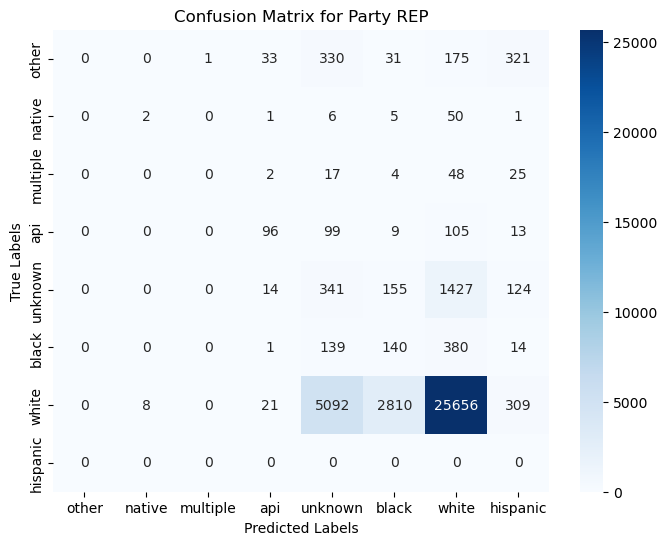

Prediction accuracy for party UNA:  0.54159121091392
['other', 'native', 'multiple', 'api', 'unknown', 'black', 'white', 'hispanic']


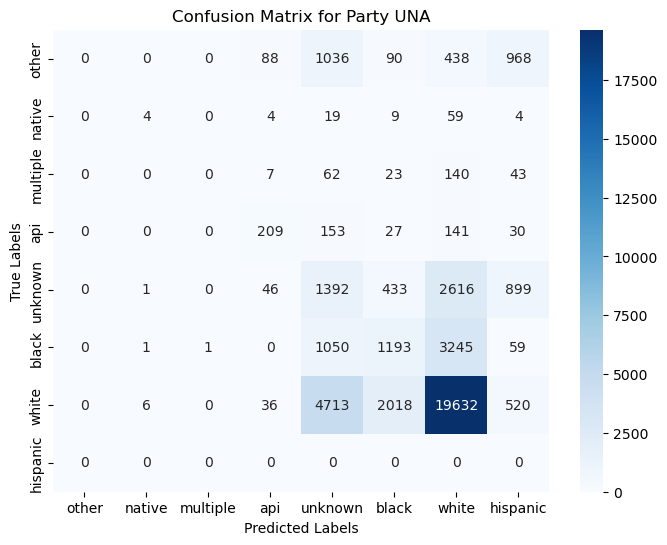

Prediction accuracy for party DEM:  0.3941985868352547
['other', 'native', 'multiple', 'api', 'unknown', 'black', 'white', 'hispanic']


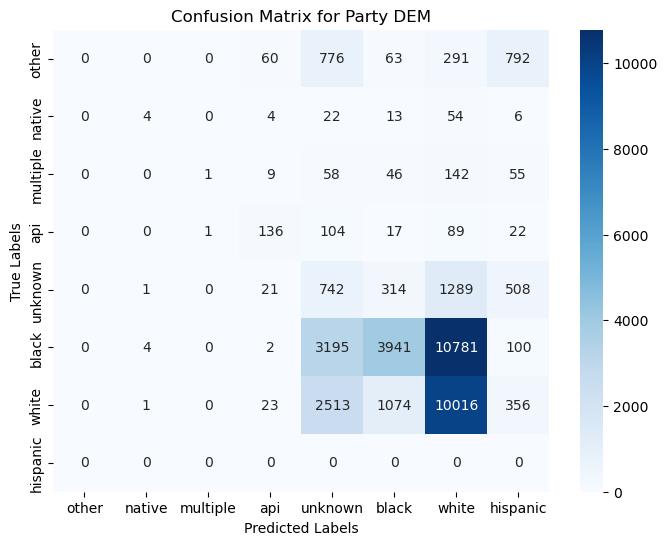

Prediction accuracy for party LIB:  0.5904907975460123
['other', 'multiple', 'api', 'unknown', 'black', 'white', 'hispanic']


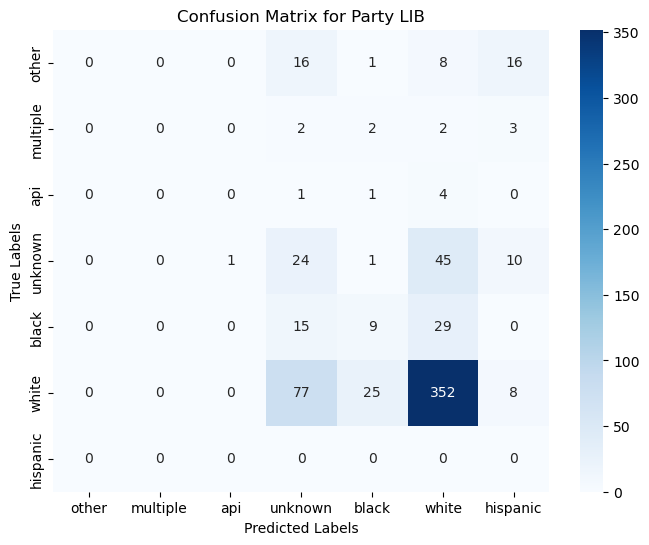

Prediction accuracy for party NLB:  0.40569395017793597
['other', 'native', 'multiple', 'api', 'unknown', 'black', 'white', 'hispanic']


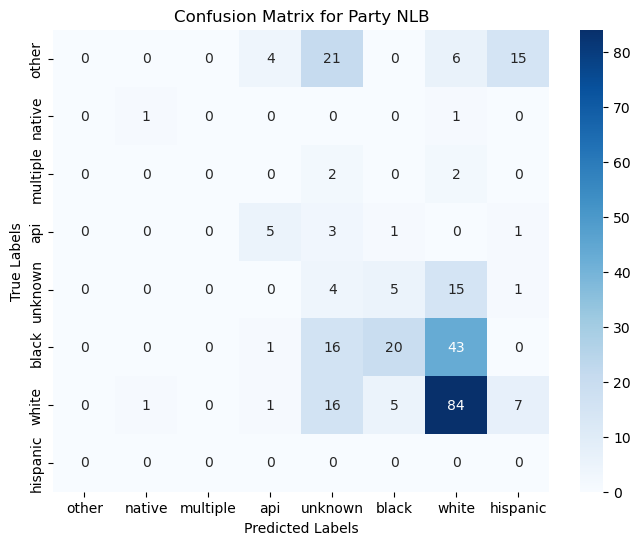

Prediction accuracy for party GRE:  0.5128205128205128
['other', 'black', 'white', 'unknown']


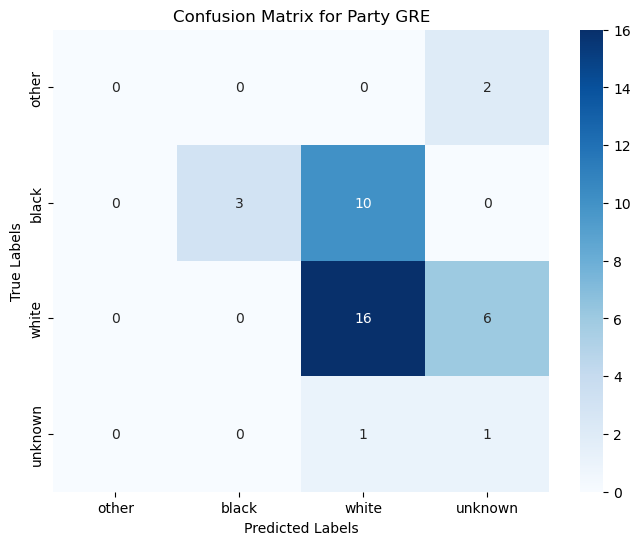

Prediction accuracy for party WTP:  0.7777777777777778
['other', 'black', 'white', 'unknown']


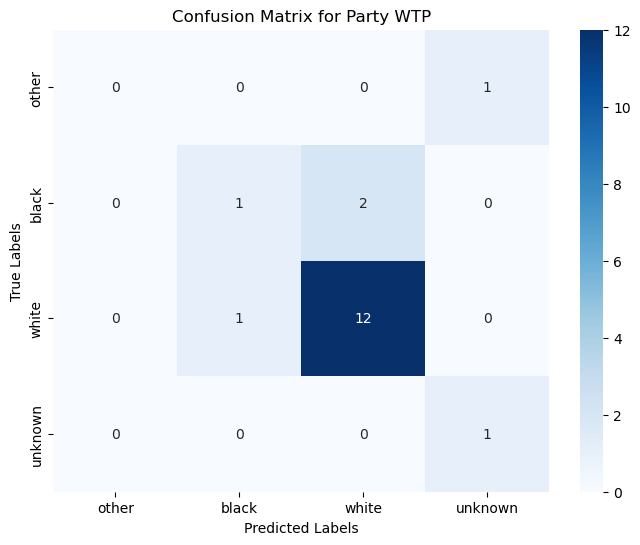

Prediction accuracy for party CST:  0.4444444444444444
['other', 'api', 'unknown', 'black', 'white']


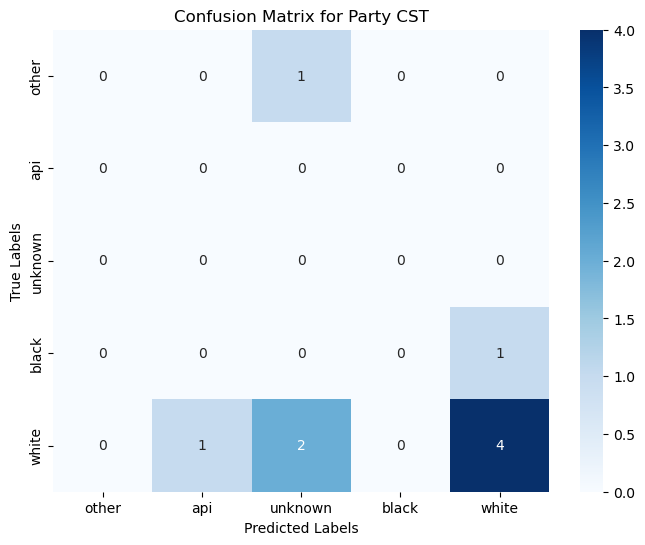

Prediction accuracy for party JFA:  0.25
['other', 'unknown', 'black', 'white', 'hispanic']


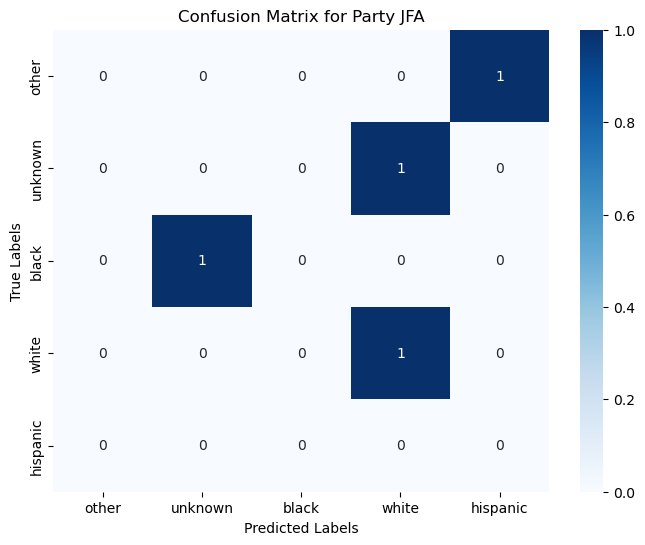

In [29]:
plot_voter_data(df=bisg_predictions)

## 

## Weight Estimator

party_cd
UNA    41415
REP    38005
DEM    37646
LIB      652
NLB      281
GRE       39
WTP       18
CST        9
JFA        4
Name: count, dtype: int64
############Visualizations for each party###############
Weighted estimation (REP): {'white': np.float64(0.3682071550404187), 'black': np.float64(0.31162615461559706), 'api': np.float64(0.2535471799093138), 'native': np.float64(0.34799691217556894), 'multiple': np.float64(0.33845976147507517), 'hispanic': np.float64(0.2857513188604343)}
True distribution (REP): {'white': np.float64(0.4571773220747889), 'black': np.float64(0.02677543666483159), 'api': np.float64(0.24586549062844543), 'native': np.float64(0.26576576576576577), 'multiple': np.float64(0.14259927797833935), 'hispanic': nan}


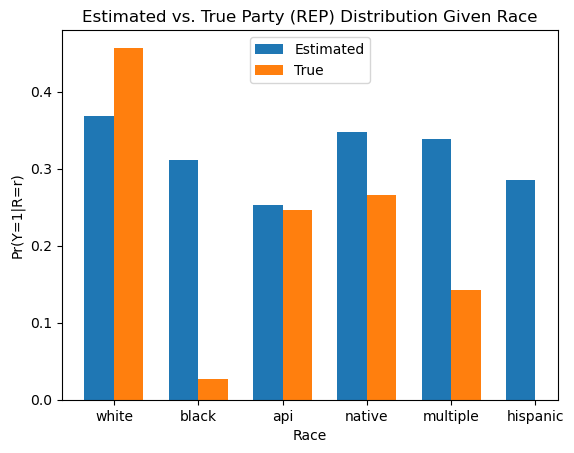

Weighted estimation (UNA): {'white': np.float64(0.32888227541911713), 'black': np.float64(0.2990510427926979), 'api': np.float64(0.42425091358495726), 'native': np.float64(0.3228742068622111), 'multiple': np.float64(0.32253299991997414), 'hispanic': np.float64(0.3774738035825701)}
True distribution (UNA): {'white': np.float64(0.35254904450511076), 'black': np.float64(0.2251639057104249), 'api': np.float64(0.4487320837927233), 'native': np.float64(0.36036036036036034), 'multiple': np.float64(0.3844765342960289), 'hispanic': nan}


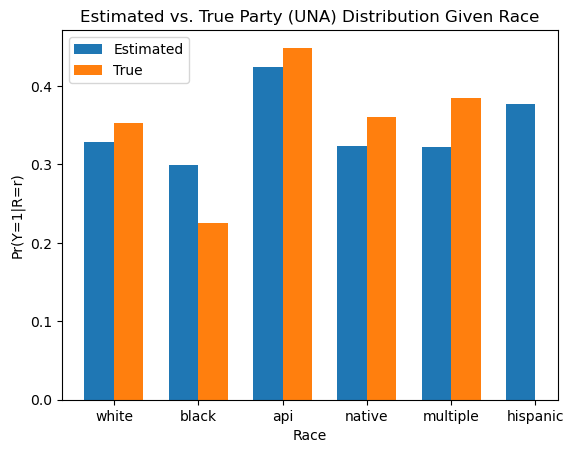

Weighted estimation (DEM): {'white': np.float64(0.29494740140374415), 'black': np.float64(0.38246291462650545), 'api': np.float64(0.3096598281222722), 'native': np.float64(0.3192053272785591), 'multiple': np.float64(0.3309344776138957), 'hispanic': np.float64(0.32699084835035974)}
True distribution (DEM): {'white': np.float64(0.1820519332105898), 'black': np.float64(0.7421049997497623), 'api': np.float64(0.2921719955898567), 'native': np.float64(0.36486486486486486), 'multiple': np.float64(0.4566787003610108), 'hispanic': nan}


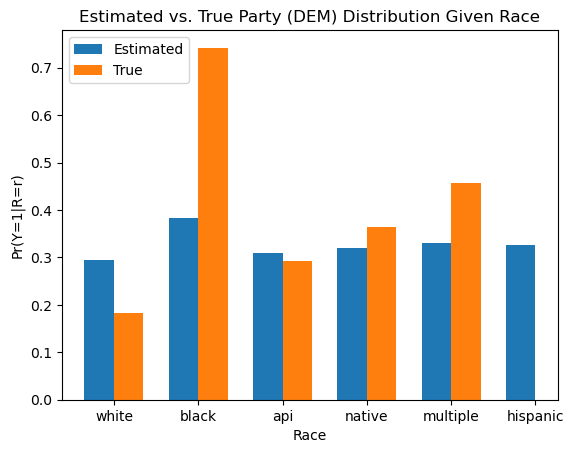

Weighted estimation (LIB): {'white': np.float64(0.005503623656480421), 'black': np.float64(0.004119865860136738), 'api': np.float64(0.0019927358968992214), 'native': np.float64(0.004450106143217771), 'multiple': np.float64(0.0048719881764728605), 'hispanic': np.float64(0.005750351941272623)}
True distribution (LIB): {'white': np.float64(0.006110723128690242), 'black': np.float64(0.0019018067163805615), 'api': np.float64(0.005512679162072767), 'native': np.float64(0.0), 'multiple': np.float64(0.01263537906137184), 'hispanic': nan}


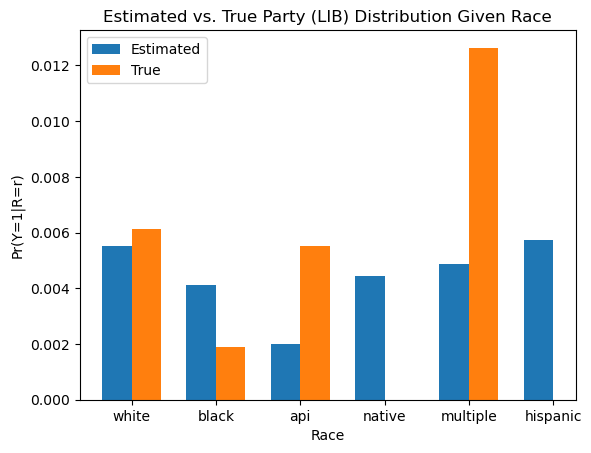

Weighted estimation (NLB): {'white': np.float64(0.0018200552961184571), 'black': np.float64(0.0021822217496151918), 'api': np.float64(0.009274808624490797), 'native': np.float64(0.0050488198798172785), 'multiple': np.float64(0.0025529177049697367), 'hispanic': np.float64(0.003730324243265895)}
True distribution (NLB): {'white': np.float64(0.0015554567963938799), 'black': np.float64(0.0032030428907462087), 'api': np.float64(0.007717750826901874), 'native': np.float64(0.009009009009009009), 'multiple': np.float64(0.0036101083032490976), 'hispanic': nan}


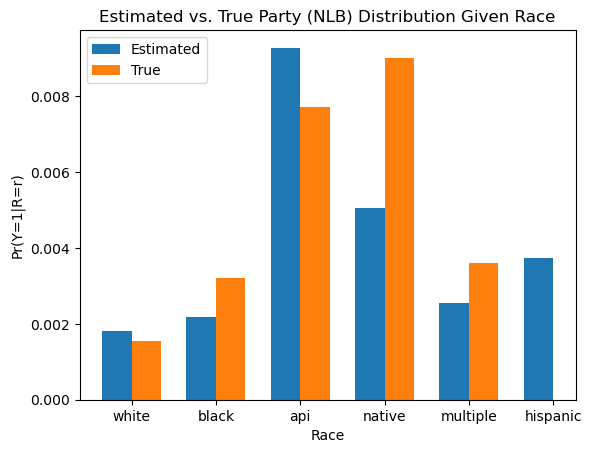

Weighted estimation (GRE): {'white': np.float64(0.0003575678388866077), 'black': np.float64(0.0003282505272289688), 'api': np.float64(0.00017442633880555407), 'native': np.float64(0.0002319042210678505), 'multiple': np.float64(0.0003110337333948996), 'hispanic': np.float64(0.0001718939294086929)}
True distribution (GRE): {'white': np.float64(0.00025395213002349056), 'black': np.float64(0.0006506180871828237), 'api': np.float64(0.0), 'native': np.float64(0.0), 'multiple': np.float64(0.0), 'hispanic': nan}


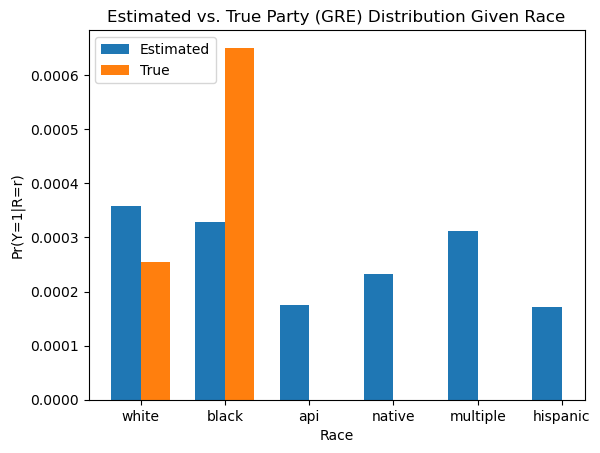

Weighted estimation (WTP): {'white': np.float64(0.0002038621743613067), 'black': np.float64(0.00016541842462118443), 'api': np.float64(3.537998091746327e-05), 'native': np.float64(0.0001461922507116208), 'multiple': np.float64(0.0001744179750861825), 'hispanic': np.float64(7.779665731922498e-05)}
True distribution (WTP): {'white': np.float64(0.0002063361056440861), 'black': np.float64(0.00015014263550372855), 'api': np.float64(0.0), 'native': np.float64(0.0), 'multiple': np.float64(0.0), 'hispanic': nan}


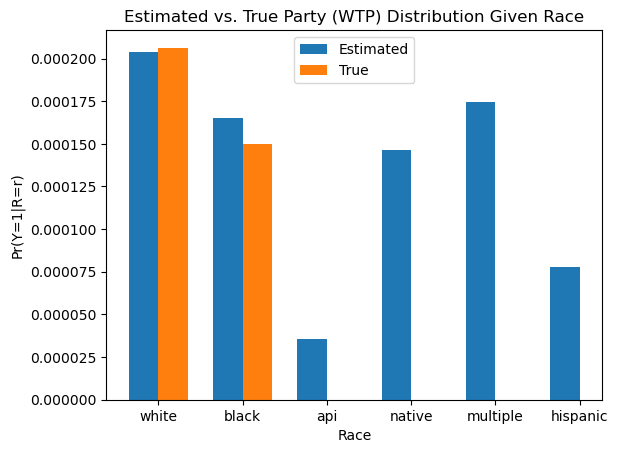

Weighted estimation (CST): {'white': np.float64(6.245122136604128e-05), 'black': np.float64(6.149826875471781e-05), 'api': np.float64(0.0010630763941258693), 'native': np.float64(4.295854220573656e-05), 'multiple': np.float64(0.00015343266730944393), 'hispanic': np.float64(5.256947533886082e-05)}
True distribution (CST): {'white': np.float64(7.936004063234081e-05), 'black': np.float64(5.004754516790951e-05), 'api': np.float64(0.0), 'native': np.float64(0.0), 'multiple': np.float64(0.0), 'hispanic': nan}


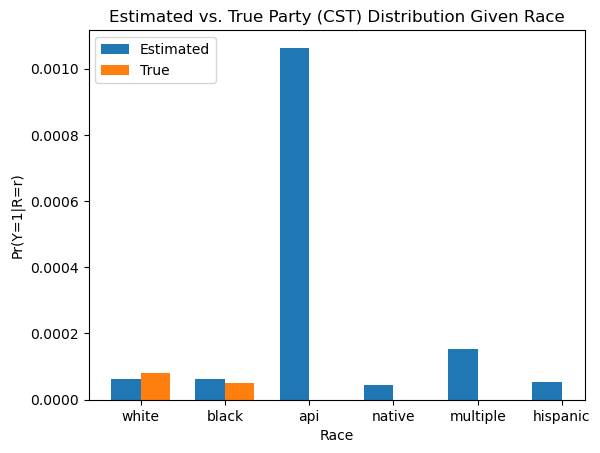

Weighted estimation (JFA): {'white': np.float64(1.560794950709235e-05), 'black': np.float64(2.633134842870406e-06), 'api': np.float64(1.6511482177367463e-06), 'native': np.float64(3.572646640473711e-06), 'multiple': np.float64(8.970733821799675e-06), 'hispanic': np.float64(1.0929600304791884e-06)}
True distribution (JFA): {'white': np.float64(1.587200812646816e-05), 'black': np.float64(0.0), 'api': np.float64(0.0), 'native': np.float64(0.0), 'multiple': np.float64(0.0), 'hispanic': nan}


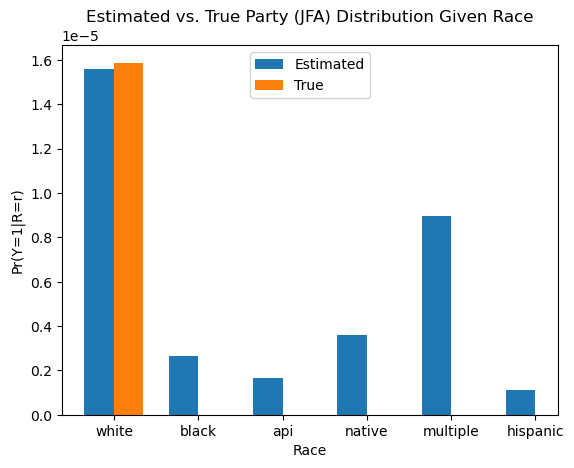

In [32]:
from utils import weighted_estimator

print(bisg_predictions['party_cd'].value_counts())

print("############Visualizations for each party###############")
for party in bisg_predictions['party_cd'].unique():
    weighted_estimator(df=bisg_predictions, party=party)